Utilizar Interligencia Artificial (LSTM) para Prever Futuro de Acoes B3

In [6]:
#Import the Libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from    sklearn.preprocessing import MinMaxScaler
from    keras.models import Sequential
from    keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [3]:
plt.style.use('fivethirtyeight')

In [7]:
#Get Stocks Quote
df = web.DataReader('AZUL4.SA', data_source='yahoo', start='2012-01-01',end='2021-01-01')

#Show the Data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-11,22.980000,21.770000,21.809999,22.400000,13060500.0,22.400000
2017-04-12,22.990000,22.299999,22.450001,22.959999,1745900.0,22.959999
2017-04-13,23.010000,22.549999,22.969999,22.990000,549600.0,22.990000
2017-04-17,23.000000,22.620001,23.000000,22.850000,249300.0,22.850000
2017-04-18,24.790001,22.600000,22.820000,23.910000,1125100.0,23.910000
...,...,...,...,...,...,...
2020-12-22,37.099998,34.630001,36.830002,35.270000,8799400.0,35.270000
2020-12-23,38.049999,35.099998,35.270000,37.700001,12345100.0,37.700001
2020-12-28,38.750000,37.169998,38.299999,37.770000,7433100.0,37.770000


In [ ]:
#Get the number of Rows and Columns of the dataset
df.shape

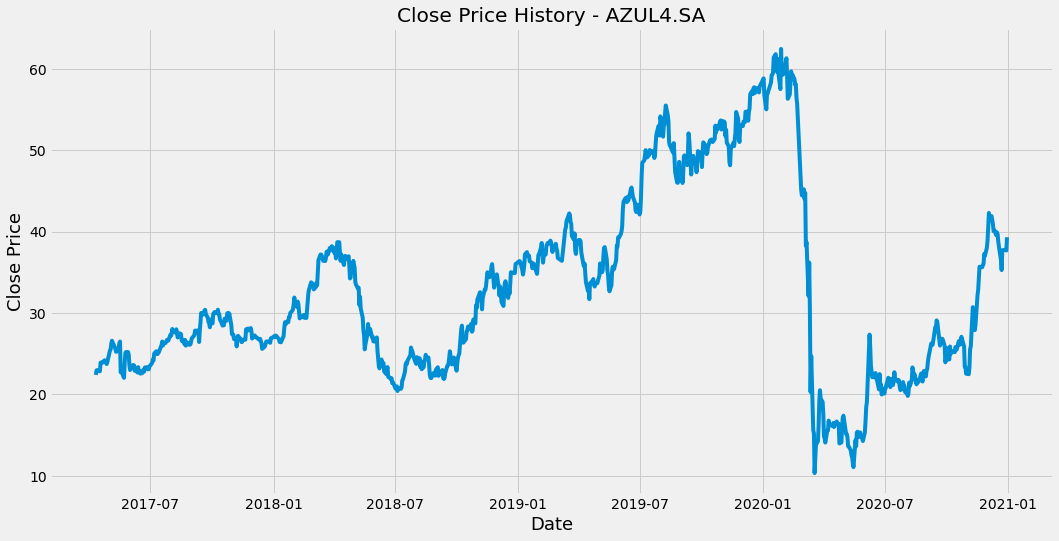

In [8]:
#Plot the Close Price History
plt.figure(figsize=(16,8))
plt.title('Close Price History - AZUL4.SA')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [9]:
#Create a new DataFrame with only the 'Close' column
data = df.filter(['Close'])

#Convert the DataFrame to a Numpy array
dataset = data.values

#Get the number of rows to train the model
training_data_len = math.ceil( len(dataset) * 0.80 )

training_data_len

740

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scale_data = scaler.fit_transform(dataset)

scaled_data

In [21]:
#Create Training Data Set
#Create the Scaled Training
train_data = scale_data[0:training_data_len, : ]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range (365, len(train_data)):
  x_train.append(train_data[i-365:i, 0])
  y_train.append(train_data[i,0])
  if i<= 365:
    print(x_train)
    print(y_train)
    print()

[array([0.23146368, 0.24222049, 0.24279676, 0.24010757, 0.26046868,
       0.26066077, 0.25950827, 0.2660392 , 0.26411833, 0.26104495,
       0.25701113, 0.2614291 , 0.2890895 , 0.29101037, 0.30560891,
       0.31213984, 0.30061467, 0.29677294, 0.29466001, 0.28620822,
       0.28620822, 0.29446792, 0.30637724, 0.31021897, 0.23761043,
       0.24298885, 0.22762198, 0.22454861, 0.26123704, 0.28351902,
       0.28543986, 0.28543986, 0.27852478, 0.25432193, 0.24298885,
       0.24606223, 0.25451402, 0.25201689, 0.25393775, 0.24106799,
       0.24587014, 0.23722629, 0.24971187, 0.24106799, 0.24106799,
       0.23472915, 0.23530542, 0.24202844, 0.24298885, 0.23914712,
       0.24894351, 0.24971187, 0.24779101, 0.24452554, 0.24548596,
       0.25163274, 0.2575874 , 0.26066077, 0.26738379, 0.26546292,
       0.28198234, 0.28716863, 0.2806377 , 0.2806377 , 0.28313484,
       0.28543986, 0.29811757, 0.30215136, 0.31021897, 0.30061467,
       0.30541682, 0.30695351, 0.31079525, 0.31406071, 0.3121

In [22]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(375, 365, 1)

In [23]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

375/375 [==============================] - 45s 113ms/step - loss: 0.0154


In [28]:
#Create the testing data set
#Create a new array containing scaled values from index 375 to 740
test_data = scale_data[training_data_len - 365: , :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(365, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [29]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [30]:
#Reshapre the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [31]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [40]:
#Get the root mean squared error (RMSE)
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.17691598613599

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


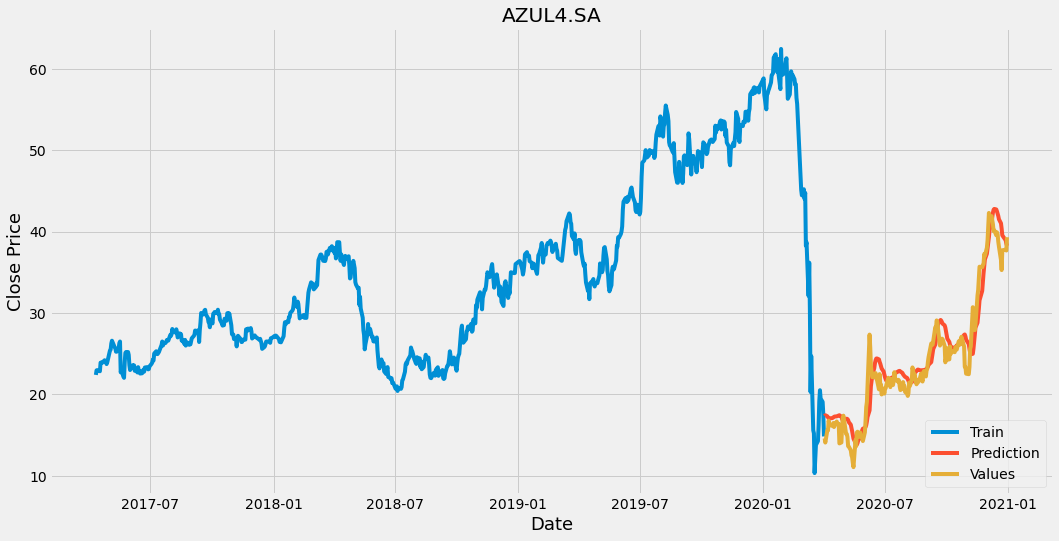

In [50]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid ['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('AZUL4.SA')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])

#plt.plot(valid['Predictions'])
#plt.legend(['Train','Val','Predictions'],loc='lower right')

plt.plot(valid[['Predictions','Close']])
plt.legend(['Train','Prediction','Values'],loc='lower right')

plt.show()


In [46]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-04-02,14.610000,17.359480
2020-04-03,14.100000,17.454153
2020-04-06,15.600000,17.323284
2020-04-07,15.600000,17.191599
2020-04-08,16.790001,17.069923
...,...,...
2020-12-22,35.270000,40.355644
2020-12-23,37.700001,39.532368
2020-12-28,37.770000,38.932568
